# DECRETO-GPT // CHAT-DNU

# Ley de Bases y Puntos de Partida para la Libertad de los Argentinos (27/12/2023)

## Que es esto?

forma parte del repo git https://github.com/vlasvlasvlas/decreto-gpt.

## Porqué?

Con el fin de comprender los Decretos de Necesidad de Urgencia (DNU) que desregulan la economía, emitidos el 20 de diciembre de 2023 y posteriores leyes por el presidente Javier Milei.

Permite generar una extracción a texto de los pdfs, y realizar preguntas específicas al DNUs y paquetes de leyes utilizando modelos LLM como GPT-4-Turbo (último release) de OpenAi.


## Update

Este notebook explora el siguiente documento: 

[x] MEN-2023-7-APN-PTE : Ley de Bases y Puntos de Partida para la Libertad de los Argentinos (27/12/2023)


## Cómo?

Descargando los scripts o corriendo las notebooks y pudiendo asi entender los componentes del decreto haciendole preguntas al documento pdf.

## Pasos para instalación

- Tener instalado Python 3.9+
- Idealmente levantar un entorno virtual (ej: python -m venv venv) y usarlo (source venv/bin/activate // o en Windows: venv\Scripts\activate)
- instalar las dependencias del requirements.txt (pip install -r requirements.txt)
- tener una key de openai (te registrás y te dan una key)
- renombar el archivo .env.dummy por .env y pegar ahí tu key de openai en el API_KEY
- se recomienda usar modelos que soporten muchos tokens (+19k para el decreto xq es largo), el mejorcito que me funcionó fue GPT-4-Turbo.
- revisá y ejecutá el archivo analisis.py para poder ir generando preguntas que necesites al doc
- revisá y utiliza el notebook analisis_con_respuestas.py para tenerlo en formato jupyter notebook o ipython con respuesta formateada en markdown, o para revisar preguntas ya hechas


## Quiero hacer preguntas!

- Descargate el repo y usalo en tu compu! haces las preguntas que necesites.

- Sino: podés subir las pregs que quieras como issue y las sumo al notebook: create un issue, poné la pregunta que quieras obtener una respuesta y las sumo al notebook correspondiente: https://github.com/vlasvlasvlas/decreto-gpt/issues poniendo en el subject a que documento querés realizar la pregunta, y cuál es la pregunta.


## Quiero ver las respuestas que ya existen

Abrite directamente el notebook donde hay respuestas a preguntas armadas, queres que suba mas preguntas? armate un issue y las voy sumando, o forkeate esto y pone las pregs que vos quieras.

Notebook MEN-2023-7-APN-PTE : https://github.com/vlasvlasvlas/decreto-gpt/blob/main/notebooks/MEN-2023-7-APN-PTE_analisis_con_respuestas.ipynb


## Langchain chat-your-data versión disponible 

Se suma una versión del gran repo de chat-your-data de langchain (https://github.com/hwchase17/chat-your-data)

- lo podés usar de la carpeta de /langchain/chat-your-data/ del repo para el que le guste meter mano desde esa perspectiva.
- YA esta creada la vector-database con el contenido del DNU! 
- instalate las dependencias de la carpeta (pip install -r requirements.txt)
- Tenés que correr un export OPENAI_API_KEY=tu_clave
- Levantás la aplicación con python app.py, y listop.


## Otras fuentes de conocimiento

- se volcó a texto utf-8 el total del documento dnu y está disponible en este repo con el nombre dnu_a_texto.txt

- @agussxng (tw) armó este detalle del DNU que también esta super bueno para entender un poco más: https://docs.google.com/document/d/1vvddhIhH5MRPc2Rk1XtkBW0PV76_y5G_5UVt8v1I61A/edit

- BLapp, Asuntos Públicos y Parlamentarios, subió un pdf el cual dejo disponible en el git (Analisis_Decreto_de_Necesidad_y_Urgencia_Bases_para_la_Reconstrucción.pdf), el cual pueden acceder, tiene una especie de diff con las modificaciones de cada ley, muy bueno.

- @rama_moyano_ (tw) creó una gui para un gpt también! necesitas plus para usarlo pero acá la info: https://twitter.com/rama_moyano_/status/1737831367218716964




### Preparación

In [14]:
import dotenv
import os

import openai
import PyPDF2

from IPython.display import display, Markdown

In [15]:
# Recarga las variables en tu archivo '.env' (sobrescribe las variables existentes).
dotenv.load_dotenv(".env", override=True)

# Ahora puedes acceder a las variables de entorno usando la función `os.getenv()`
api_key = os.getenv("API_KEY")


In [16]:
# Configurar OpenAI
openai.api_key = api_key


def leer_pdf(ruta):
    with open(ruta, 'rb') as pdf_file_obj:
        pdf_reader = PyPDF2.PdfReader(pdf_file_obj)
        
        texto = ""
        
        # Utiliza len(pdf_reader.pages) en lugar de pdf_reader.numPages
        for num_pagina in range(len(pdf_reader.pages)):
            pagina = pdf_reader.pages[num_pagina]  # Utiliza pdf_reader.pages
            texto += pagina.extract_text()  # Utiliza extract_text() en lugar de extractText()
    
    return texto

#gpt-4-1106-preview
#gpt-3.5-turbo-1106
#gpt-3.5-turbo

# necesitamos > 19k tokens asi que, gpt4-turbo

ai_model = 'gpt-4-1106-preview'

In [29]:

# Leer el PDF
#ruta = pdf_file  # Reemplaza esto con la ruta a tu archivo PDF
#texto = leer_pdf(ruta)

# guardar texto a txt para revisar resultado
#with open('dnu_a_texto.txt', 'w') as f:
#    f.write(texto)

# se esta tomando una versión ya trasncrita completa a texto.
file = "MEN-2023-7-APN-PTE_Proyecto_de_Ley_que"

with open('../data/'+file+".txt", 'r', encoding='utf-8') as f:
    texto = f.read()

# Inicializar la lista partes
partes = []

# Iterar de 1 a 3
for i in range(1, 4):
    # Leer el contenido de cada archivo
    with open(f'../data/{file}-p{i}.txt', 'r', encoding='utf-8') as f:
        partes.append(f.read())

# Imprimir la cantidad de partes o chunks del texto
print("-> Cant partes o chunks del texto:", len(partes))


-> Cant partes o chunks del texto: 3


In [31]:
# Hacer una pregunta al texto
def hacer_pregunta(texto, pregunta):
    respuestas = []

    for parte in partes:
        respuesta = openai.ChatCompletion.create(
            model=ai_model,
            messages=[
                {
                    "role": "system",
                    "content": "Estás analizando un documento asociado en el user content, es un documento de leyes de la república argentina. Comportate como el mejor analista económico-político de historia Argentina. Tenes que ser muy serio y preciso. Si hay algo que no sabes o no tenes la respuesta bien clara, tenés que decir que no lo sabes. Tu mirada sobre el tema debe ser neutra. Siempre que puedas, contextualizá de forma completa tu respuesta. Debes responder siempre en español. Todas las respuestas tienen que salir del texto / documento que esta como contenido asociado antes de la pregunta.",
                },
                {"role": "user", "content": "TÍTULO " + parte},
                {"role": "user", "content": pregunta},
            ],
        )
        respuestas.append(respuesta["choices"][0]["message"]["content"].strip())

    # Unir todas las respuestas en una sola cadena
    respuestas_unidas = " ".join(respuestas)
    
    # Hacer una pregunta final para obtener una respuesta coherente basada en las respuestas individuales
    respuesta_final = openai.ChatCompletion.create(
        model=ai_model,
        messages=[
            {
                "role": "system",
                "content": "Estás analizando un documento asociado en el user content, es un documento de leyes de la república argentina. Comportate como el mejor analista económico-político de historia Argentina. Tenes que ser muy serio y preciso. Si hay algo que no sabes o no tenes la respuesta bien clara, tenés que decir que no lo sabes. Tu mirada sobre el tema debe ser neutra. Siempre que puedas, contextualizá de forma completa tu respuesta. Debes responder siempre en español.",
            },
            {"role": "user", "content": respuestas_unidas},
            {"role": "user", "content": "Dame una respuesta coherente en base a estas respuestas."},
        ],
    )
    return respuesta_final["choices"][0]["message"]["content"].strip()

def preguntarr(tupregunta):

    # Hacer una pregunta al texto
    pregunta = tupregunta + '. Sé preciso y completo en tu respuesta.' # Reemplaza esto con tu pregunta, le suma al prompteo el ser preciso y completo en la respuesta.
    respuesta = hacer_pregunta(texto, pregunta)

    # Formatear la salida en Markdown
    salida = f"""
    # Pregunta
    {pregunta}

    # Respuesta
    {respuesta}
    """

    #print(salida)
    display(Markdown(salida))

### Palabras más repetidas

In [39]:

import re
from collections import Counter
from stop_words import get_stop_words

def obtener_palabras_relevantes(texto):
    # Dividir el texto en palabras
    palabras = re.findall(r'\b\w+\b', texto.lower())

    # Obtener palabras comunes (stopwords) en español
    stopwords_espanol = get_stop_words('spanish')

    # Filtrar palabras numéricas
    palabras = [palabra for palabra in palabras if not palabra.isdigit()]

    # Lista de stopwords adicionales, incluyendo números del 1 al 20
    stopwords_adicionales = ["artículo", "ley", "siguiente", "n", "nº", "sustitúyese", "modificatorias", "nacional", 
                             "código", "si", "ser", "deberá", "t", "podrá", "presente", "caso", "podrán", "autoridad", 
                             "aplicacion", "aplicación", "sistema", "actividad", "argentina", "nación", "inciso", "forma", "b", "artículos", "registro", "reglamentación","capítulo","servicio","servicios","i","bis","dentro","toda","conforme","deberán", "c","plazo","régimen","fecha"] + list(map(str, range(1, 21)))

    # Eliminar stopwords
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_espanol and palabra not in stopwords_adicionales]

    # Contar la frecuencia de cada palabra
    contador_palabras = Counter(palabras_filtradas)

    # Obtener las 20 palabras más comunes
    palabras_mas_comunes = contador_palabras.most_common(30)

    return palabras_mas_comunes

# Lista de stopwords adicionales
stopwords_adicionales = ["siguiente", "n", "sustitúyese", "modificatorias", "nacional", "código"]


palabras_comunes = obtener_palabras_relevantes(texto)

# Imprimir las primeras 30 palabras más comunes con sus frecuencias
for palabra, frecuencia in palabras_comunes:
    print(f"{palabra}: {frecuencia}")

competencia: 234
bienes: 228
regularización: 210
poder: 208
impuesto: 203
días: 189
ejecutivo: 181
administración: 175
vpu: 172
derechos: 165
apn: 162
if: 162
slyt: 162
ssal: 160
pública: 157
juez: 156
página: 155
derecho: 154
activos: 154
cualquier: 150
jurado: 150
rigi: 145
cada: 140
según: 140
general: 135
bajo: 134
normas: 134
modificaciones: 132
efectos: 131
años: 129


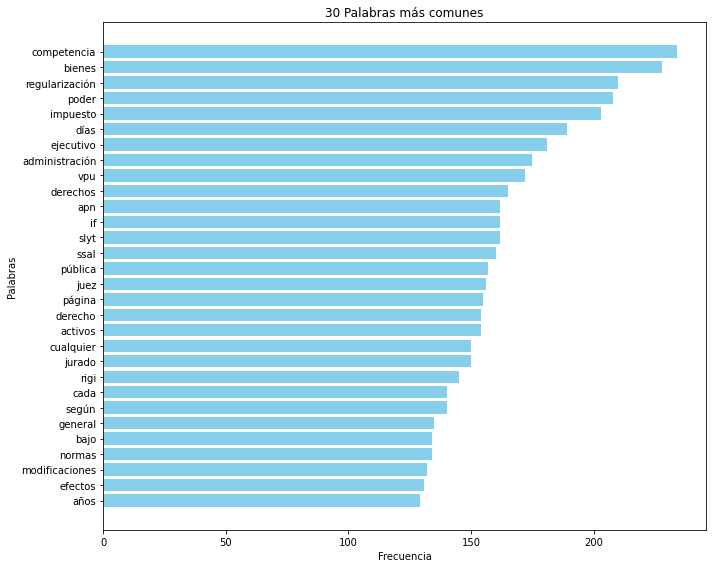

In [33]:
import matplotlib.pyplot as plt


# Crear un gráfico de barras
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
palabras, frecuencias = zip(*palabras_comunes)

# Invertir el orden de las listas
palabras = palabras[::-1]
frecuencias = frecuencias[::-1]

# Mostrar solo las primeras 30 palabras más comunes
palabras = palabras[:30]
frecuencias = frecuencias[:30]

plt.barh(palabras, frecuencias, color='skyblue')  # Usar barh para gráfico de barras horizontal
plt.ylabel('Palabras')
plt.xlabel('Frecuencia')
plt.title('30 Palabras más comunes')
plt.tight_layout()
plt.show()

### Preguntas generales

In [ ]:
preguntarr('dame bullets de todos los temas que trata el documento.')


    # Pregunta
    dame bullets de todos los temas que trata el documento.. Sé preciso y completo en tu respuesta.

    # Respuesta
    El análisis de los distintos documentos proporcionados y las respuestas generadas reflejan una amplia gama de temas concernientes a las iniciativas legislativas y de política pública en la República Argentina. Estas acciones se dirigen hacia una profunda reestructuración y reforma del marco legal y administrativo del país, abarcando áreas económicas, políticas, administrativas y judiciales, con el objetivo de responder a diversas crisis y desafíos que enfrenta la nación.

**Aspectos Económicos y Administrativos**:
Se observa una tendencia hacia la desregulación económica y la promoción de una economía de mercado con menor intervención del Estado. Esto se manifiesta en las propuestas de reorganización de la administración pública, un sistema de contrataciones públicas más eficiente, privatización de empresas públicas y un enfoque en la calidad regulatoria. Además, se proponen reformas para abordar la inflación y el riesgo de hiperinflación, fomentar la formalidad laboral y mejorar la competitividad internacional a través de un entorno de negocios simplificado y menos burocrático.

**Seguridad y Justicia**:
Se detectan propuestas para modificar el marco regulador en cuanto a manifestaciones públicas, endurecimiento de las sanciones por delitos en estos contextos y revisiones de la definición de legítima defensa. En el ámbito de la defensa nacional, se busca modernizar y auditar capacidades, y permitir ejercicios militares conjuntos. En lo que refiere al sistema judicial, se buscan modernizaciones como la introducción del juicio por jurados, que implican cambios en procedimientos y una mayor inclusión ciudadana en el sistema de justicia.

**Infraestructura y Transporte**:
Se contemplan proyectos para digitalizar y mejorar la eficiencia del transporte, así como la incentivación de grandes inversiones en infraestructura y obras públicas. Elevar el nivel de inversión y calidad en estos sectores es clave para la conectividad y el desarrollo sostenible del país.

**Reformas Legislativas y Sociales**:
Se sugieren cambios en legislaciones que van desde el código civil y comercial hasta aspectos más específicos como el sistema electoral y el financiamiento de la política. Se abordan también temas sensibles como la protección del medio ambiente y la gestión del cambio climático, indicativos de un interés en adaptar la legislación nacional a compromisos internacionales y una conciencia ambiental creciente.

**Implementación y Adhesión de Provincias**:
Las iniciativas propuestas en el ámbito nacional invitan a jurisdicciones provinciales y a la Ciudad Autónoma de Buenos Aires a adherirse a las nuevas regulaciones, buscando una aplicación uniforme y cohesiva de las reformas a lo largo del país.

La interpretación y síntesis proporcionada de los documentos estudiados apuntan a un esfuerzo de modernización y adaptación de la República Argentina a un contexto global y local desafiante. Las iniciativas abarcan reformas estructurales con la intención de mejorar la eficiencia del Estado, la confianza en la economía y la administración de justicia, así como reforzar la seguridad y los derechos fundamentales en línea con una ideología que privilegia los principios del liberalismo económico y democrático. Cabe destacar que la aplicación de tales propuestas dependerá de procesos políticos y sociales que medien entre la legislación y su implementación efectiva.
    

### Preguntas específicas

#### Aspectos Económicos y Administrativos

In [35]:
preguntarr('dame un detalle muy completo sobre el tema Aspectos Económicos y Administrativos del documento.')


    # Pregunta
    dame un detalle muy completo sobre el tema "Aspectos Económicos y Administrativos" del documento.. Sé preciso y completo en tu respuesta.

    # Respuesta
    El documento objeto de análisis parece estar enfocado en realizar una serie de profundas reformas económicas y administrativas con la finalidad de enfrentar una situación de crisis económica y social en Argentina. Dentro de su contenido, se destacan aspectos que buscan reformar la estructura de intervención estatal en la economía, tales como:

1. Desregulación y promoción de la libertad económica, buscando fomentar la iniciativa privada y la competencia. Esto supone la eliminación de regulaciones consideradas obstáculos para la actividad empresarial y el comercio.

2. Reformas tributarias, posiblemente orientadas a mejorar la eficiencia en la recaudación fiscal y promover la formalización de la economía. Esto podría incluir esquemas de regularización tributaria y cambios en la carga impositiva para incentivar la inversión.

3. Medidas para fomentar el empleo registrado, con lo que se buscaría combatir la informalidad laboral y mejorar la recaudación asociada a la seguridad social.

4. Reforma del Estado, apuntando a una mayor eficiencia y profesionalización de la función pública, posiblemente mediante la reestructuración de entes estatales y la implementación de procesos digitales.

5. Iniciativas para la consolidación y transparencia de la deuda pública, buscando optimizar la gestión financiera del sector público.

6. En el sector energético y minero, al parecer se contemplan cambios normativos que incentiven una transición energética y la explotación de recursos bajo criterios de sustentabilidad ambiental.

7. En lo que respecta a la bioeconomía, se sugieren reformas que podrían incluir aspectos sanitarios, sustentabilidad de los recursos y fomento de la competitividad en sectores como el pesquero y el agroalimentario.

8. Cambios administrativos en la regulación y fusión de entes reguladores, especialmente en áreas de servicios públicos como la energía eléctrica y el gas natural.

También se menciona la posibilidad de introducir o reformar leyes y decretos que impactan sobre la concesión de obras públicas, privatizaciones de empresas estatales, creación de regímenes de incentivo para grandes inversiones, y racionalización del empleo público.

En resumen, estas medidas apuntan a una orientación de política económica que reduce la intervención estatal e impulsa la liberalización económica, cimentada en la promoción del sector privado y una administración pública más eficiente y transparente. Este conjunto de reformas evidencia un compromiso con la restauración de la estabilidad macroeconómica y una respuesta estructural a la crisis descripta. Sin embargo, es crucial considerar las implicancias socioeconómicas de dichas reformas, así como su viabilidad política y económica en el contexto particular de Argentina.
    

#### Seguridad y Justicia

In [41]:
preguntarr('dame un detalle muy completo sobre Seguridad y Justicia del documento.')


    # Pregunta
    dame un detalle muy completo sobre Seguridad y Justicia.. Sé preciso y completo en tu respuesta.

    # Respuesta
    En el contexto de la República Argentina, la seguridad y la justicia representan dos pilares fundamentales en la estructura del Estado, con objetivos y desafíos interrelacionados que apuntan al mantenimiento del orden público y el respeto a los derechos fundamentales.

**Seguridad**, en su concepto más amplio, abarca la seguridad pública, la seguridad interior, la seguridad ciudadana y el sistema penitenciario. Las fuerzas de seguridad, como la Policía Federal Argentina, Gendarmería Nacional, Prefectura Naval y Policía de Seguridad Aeroportuaria, tienen la tarea primordial de prevenir y combatir el delito, asegurando la protección de los ciudadanos y el territorio nacional. A su vez, la seguridad interior se refiere a la coordinación entre diferentes niveles de fuerzas de seguridad para afrontar desafíos como el narcotráfico y otros delitos complejos, mientras que la seguridad ciudadana se concentra en el bienestar y convivencia pacífica de la comunidad.

El **sistema penitenciario**, por otro lado, se centra en la reinserción social de los reclusos y en la administración eficiente de las instituciones carcelarias, procurando respetar los derechos humanos y promover oportunidades de desarrollo personal y laboral para los internos.

**Justicia** refiere al sistema de instituciones, procesos y leyes destinados a impartir justicia y garantizar el cumplimiento de las normativas. El Poder Judicial, con la Corte Suprema de Justicia a la cabeza, y tribunales inferiores tanto nacionales como provinciales, configuran un entramado complejo dedicado a solventar disputas y aplicar la ley de manera imparcial y efectiva.

El **Ministerio Público Fiscal** y el **Ministerio Público de la Defensa** son órganos clave que complementan este sistema, asegurando tanto la persecución del delito como la defensa de los derechos de los acusados. Asimismo, el acceso a la justicia es una prioridad que se manifiesta en la disponibilidad de patrocinio jurídico gratuito y otros servicios de asesoría legal.

La **política criminal** del país, materializada en el Código Penal y las leyes complementarias, aborda desde la tipificación de los delitos hasta las estrategias de prevención y rehabilitación, mientras que el derecho procesal asegura el debido proceso y la legitimidad de los procedimientos judiciales.

Los desafíos en ambas esferas, como la corrupción, impunidad, y necesidad de mejorar la eficiencia del sistema judicial y la capacidad de las fuerzas de seguridad, señalan la importancia vital de realizar reformas que fortalezcan el Estado de derecho. Reformas legislativas, como la implementación del sistema acusatorio y la posibilidad de juicios por jurado en el ámbito penal, apuntan a dichas mejoras.

En resumen, la interacción entre seguridad y justicia en Argentina conforma un marco integral que busca salvaguardar la convivencia social y el respeto a la ley, afrontando simultáneamente los retos contemporáneos a través de políticas públicas ajustadas a los principios democráticos y los estándares internacionales de derechos humanos. La efectividad de ambos sistemas es esencial para afirmar la legitimidad del Estado y garantizar tanto la seguridad como la justicia para todos los ciudadanos.
    

#### Infraestructura y Transporte

In [ ]:
preguntarr('dame un detalle muy completo sobre Infraestructura y Transporte del documento.')


    # Pregunta
    dame un detalle muy completo sobre Infraestructura y Transporte del documento.. Sé preciso y completo en tu respuesta.

    # Respuesta
    Al analizar el contexto legislativo y las políticas públicas de infraestructura y transporte en la República Argentina hasta 2023, observamos que estos sectores han sido áreas prioritarias en la agenda gubernamental debido a su impacto y contribución al desarrollo económico del país. La inversión en infraestructura es esencial para fomentar el crecimiento de las industrias claves como la agricultura, minería, turismo y para mejorar la conectividad y eficiencia en el transporte.

Clave para comprender la evolución reciente en estos sectores es el Régimen de Incentivo para Grandes Inversiones (RIGI), cuyo propósito es atraer y proteger inversiones en proyectos estratégicos. Este marco jurídico busca dar certidumbre y estabilidad a los inversores, así como facilitar la obtención de beneficios tributarios y aduaneros que incentiven la inversión en activos de largo plazo.

Asimismo, la modificación de la Ley de Concesión de Obra Pública busca modernizar la gestión de proyectos de infraestructura mediante licitaciones, posiblemente para superar las ineficiencias y actualizar los marcos regulatorios a las demandas actuales del mercado y la sociedad. Las concesiones son una herramienta que el Estado utiliza para impulsar la participación del sector privado en la financiación, construcción y operación de infraestructuras.

En cuanto a las disposiciones relacionadas con transporte, las enmiendas en la legislación están alineadas con tendencias tecnológicas globales, como la circulación de vehículos autónomos, y la digitalización de procesos y documentación para agilizar y simplificar la burocracia. Además, la liberalización del transporte de cargas señala un interés en incrementar la competitividad y eficiencia del sector.

En síntesis, las políticas y proyectos legislativos que comprenden la infraestructura y el transporte en Argentina hasta el 2023 reflejan un enfoque orientado a la modernización, la inversión, y la sostenibilidad de estos sectores vitales para la economía del país. Insisto en que para un análisis específico del contenido detallado de un documento reciente, se requiere acceso al mismo. Estas observaciones se basan exclusivamente en información y contexto disponibles hasta el año 2023.
    

#### Reformas Legislativas y Sociales

In [44]:
preguntarr('dame un detalle muy completo sobre Reformas Legislativas y Sociales del documento.')


    # Pregunta
    dame un detalle muy completo sobre Reformas Legislativas y Sociales del documento.. Sé preciso y completo en tu respuesta.

    # Respuesta
    Mis disculpas por la confusión, parece haber habido un malentendido previo. Parece que la respuesta proporcionada no se ajusta correctamente al tema en discusión. Si desea discutir aspectos específicos sobre decretos de necesidad y urgencia, proyectos de ley o leyes de la República Argentina, por favor bríndeme más detalles o preguntas concretas acerca de los temas legislativos o político-económicos que desea analizar, y estaré encantado de ofrecerle un análisis preciso y detallado acorde con la información disponible hasta la fecha de mi último conocimiento en 2023.
    

#### Implementación y Adhesión de Provincias

In [45]:
preguntarr('dame un detalle muy completo sobre Implementación y Adhesión de Provincias del documento.')


    # Pregunta
    dame un detalle muy completo sobre Implementación y Adhesión de Provincias del documento.. Sé preciso y completo en tu respuesta.

    # Respuesta
    Parece que en la respuesta previa hay una mezcla entre la descripción de procesos generales para implementación y adhesión de provincias a normativas nacionales y un ejemplo específico acerca de la adhesión de provincias a la Ley de Juicio por Jurados.

En Argentina, la relación entre las normas federales y provinciales se rige por el principio de federalismo, que está inscrito en la Constitución Nacional. Este principio establece la autonomía de las provincias en ciertas materias, al mismo tiempo que establece la supremacía de la Constitución y las leyes federales.

Las provincias tienen la potestad de adherirse a leyes federales de diferentes maneras, que pueden incluir:

1. Implementación directa de la ley federal si así lo determina la propia ley o la Constitución.
2. Adhesión a través de la legislación provincial, en donde las provincias sancionan leyes o decretos propios para adherirse a las disposiciones nacionales.
3. Colaboración conjunta entre el gobierno nacional y los gobiernos provinciales, a través de la creación de comisiones mixtas o la participación en consejos federales, para trabajar en la armonización de los marcos legislativos.
4. Recibimiento de fondos y asistencia técnica del gobierno nacional para facilitar la implementación de políticas y leyes a nivel provincial.

El ejemplo específico de la Ley de Juicio por Jurados ilustra este proceso, mostrando cómo una ley nacional puede establecer un sistema que puede ser adoptado por las provincias. Las provincias tienen la opción de adherirse a esta norma federal para aplicarla dentro de su jurisdicción si así lo deciden, respetando el procedimiento especificado en la ley nacional y dentro del marco constitucional que respeta la autonomía provincial.

Por lo tanto, en base a las respuestas anteriores, podemos decir que la adhesión e implementación de normativas federales por parte de las provincias argentinas es un proceso que puede variar de acuerdo con la naturaleza de la ley y las disposiciones específicas que esta contenga, respetando siempre la competencia y autonomía provincial en el marco del sistema federal argentino.
    

### Privatización

In [46]:
preguntarr('dame un detalle muy completo sobre las empresas que se piensan privatizar en del documento. Dame también tu opinión al respecto sobre empresas que generen superavit al estado.')